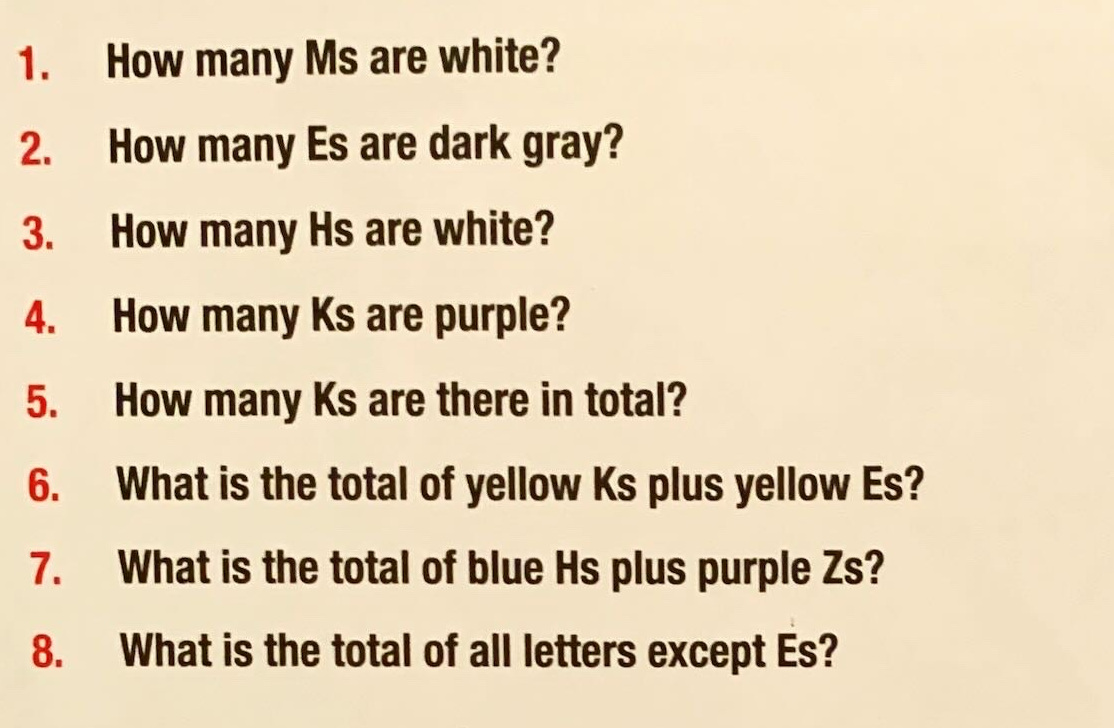

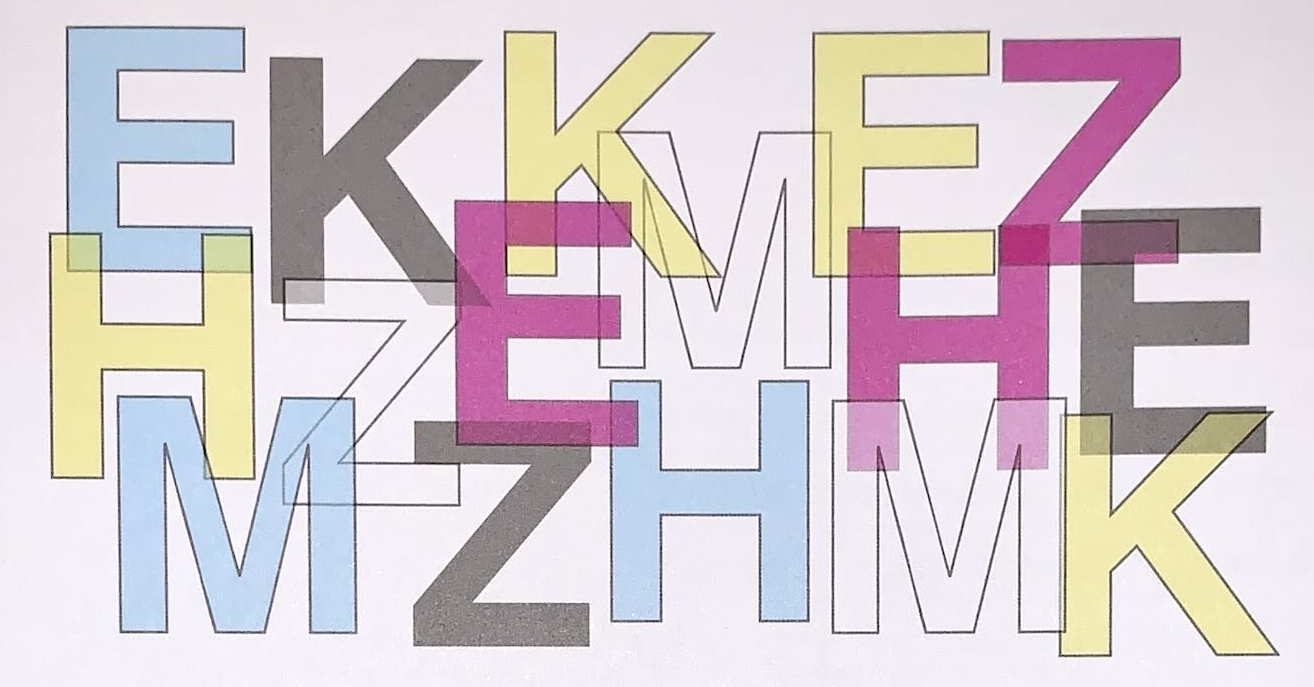

In [43]:
from turtle import color
from IPython.display import display
from PIL import Image, ImageOps, ImageDraw, ImageFilter, ImageEnhance
import numpy as np

questionsImage = Image.open('q.jpeg')
inputImage = Image.open('p.png').convert('RGB')
display(questionsImage)
display(inputImage)

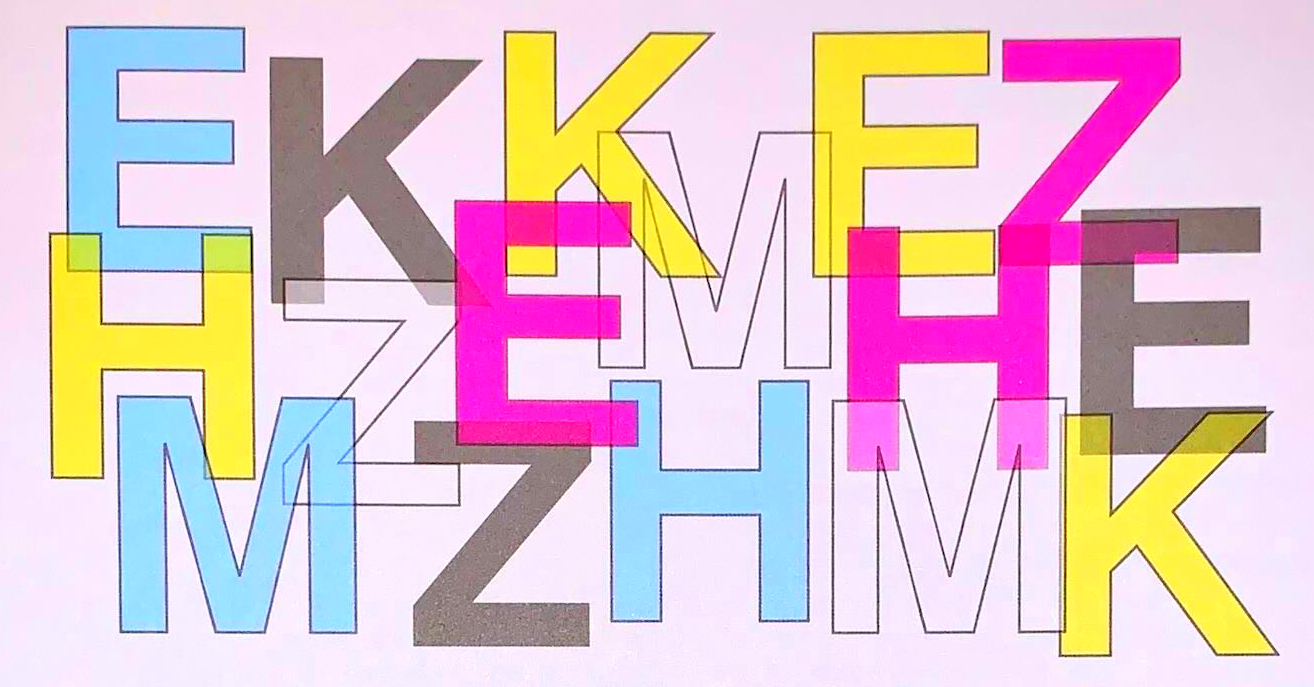

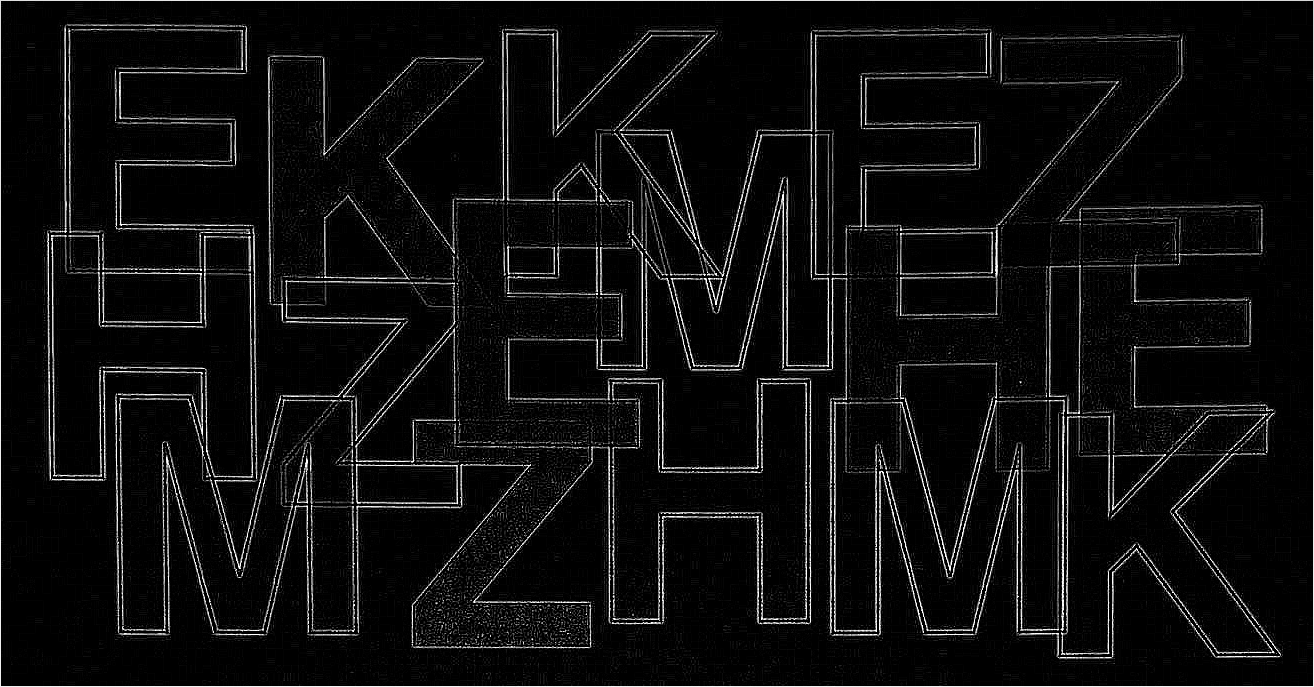

In [44]:
converter = ImageEnhance.Color(inputImage)
inputImage = converter.enhance(3.0)
display(inputImage)

grayscale = inputImage.convert('L')

edges = grayscale.filter(ImageFilter.FIND_EDGES)

display(edges)

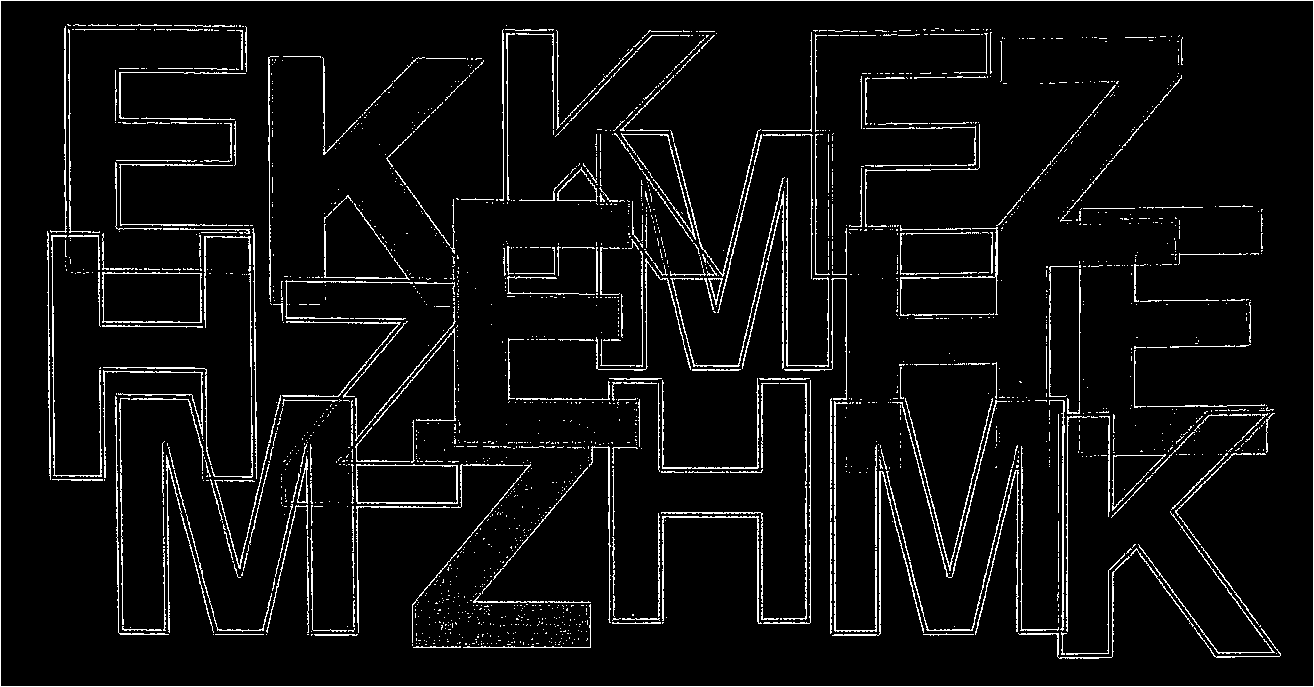

In [45]:
thresh = 100
fn = lambda x : 255 if x > thresh else 0
monochrome = edges.convert('L').point(fn, mode='1')
display(monochrome)

(687, 1314)


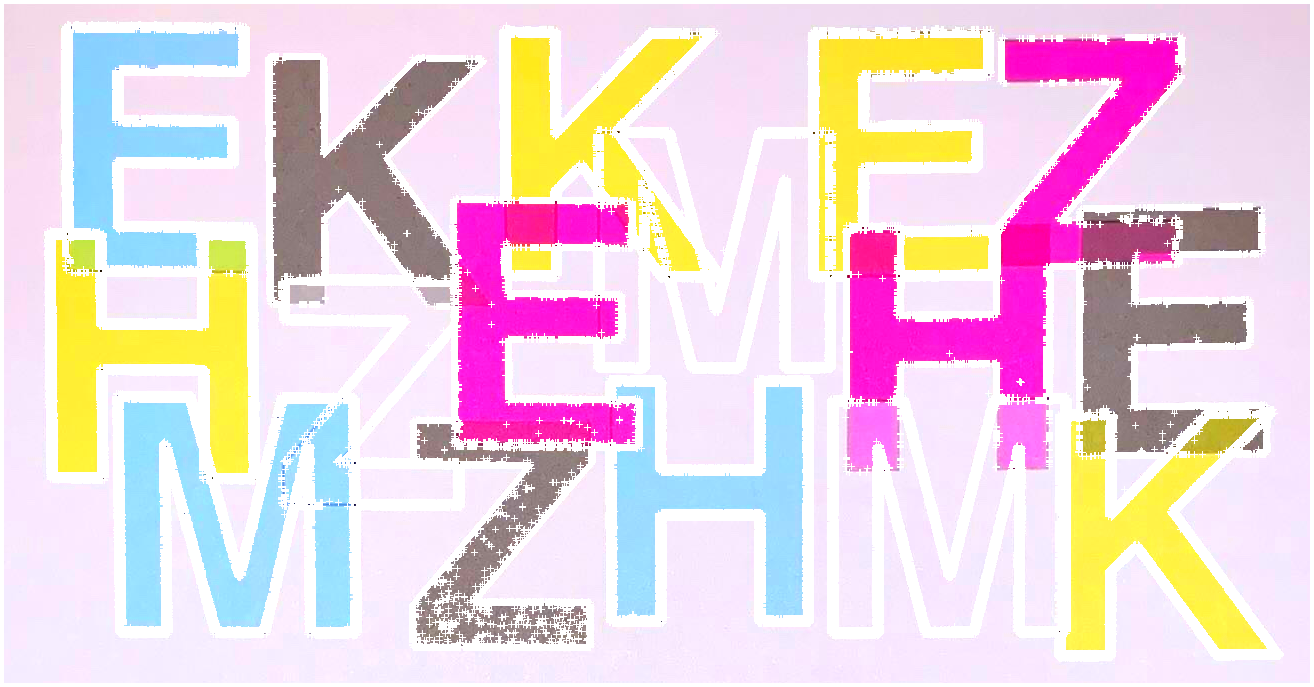

In [46]:
monochromeEdges = np.asarray(monochrome)
monochrome = 0 - monochromeEdges
draw = ImageDraw.Draw(inputImage)
print(monochromeEdges.shape)
for i in range(len(monochromeEdges)):
    for j in range(len(monochromeEdges[i])):
        if monochromeEdges[i][j] == 1:
            draw.point((j, i), fill=(255, 255, 255))
            draw.point((j+1, i), fill=(255, 255, 255))
            draw.point((j-1, i), fill=(255, 255, 255))
            draw.point((j, i+1), fill=(255, 255, 255))
            draw.point((j, i-1), fill=(255, 255, 255))

            draw.point((j+2, i), fill=(255, 255, 255))
            draw.point((j-2, i), fill=(255, 255, 255))
            draw.point((j, i+2), fill=(255, 255, 255))
            draw.point((j, i-2), fill=(255, 255, 255))

            draw.point((j+3, i), fill=(255, 255, 255))
            draw.point((j-3, i), fill=(255, 255, 255))
            draw.point((j, i+3), fill=(255, 255, 255))
            draw.point((j, i-3), fill=(255, 255, 255))

display(inputImage)

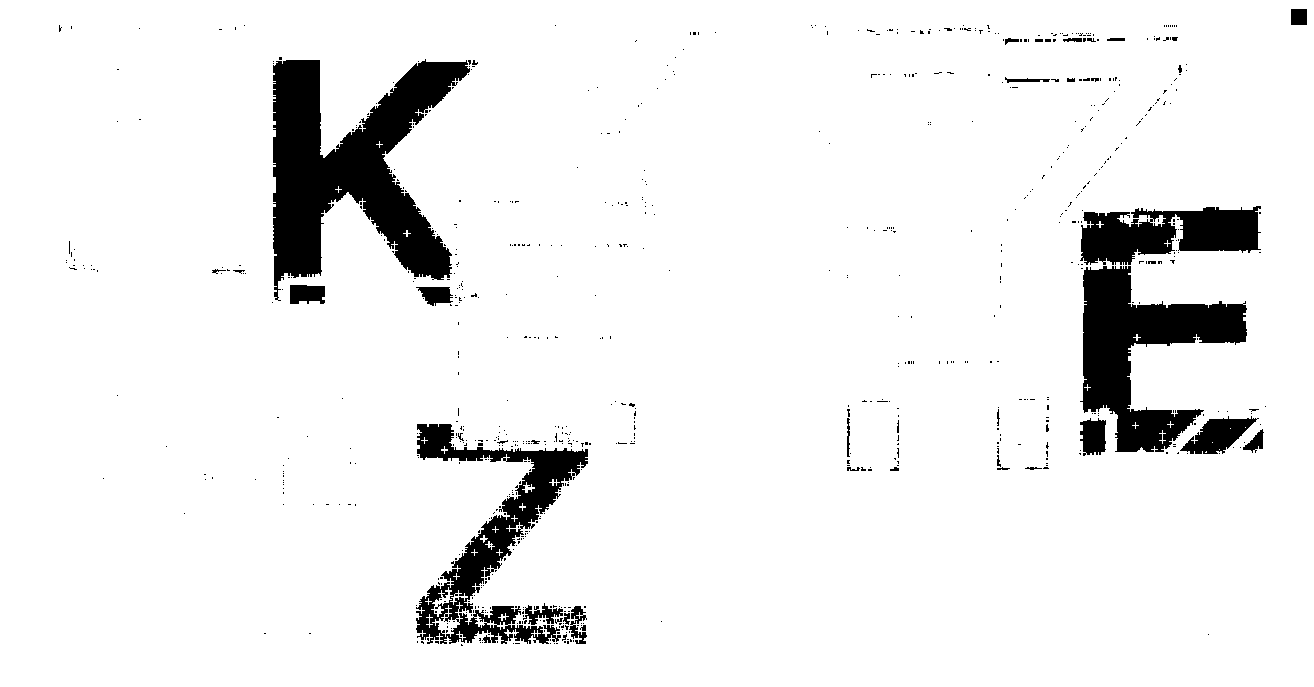

In [47]:
# Question 2
# How Many E's are dark grey?

def justGray(r, g, b):
    rbase = 145
    gbase = 124
    bbase = 124
    delta = 100
    if (rbase-delta <= r <= rbase+delta) and (gbase-delta <= g <= gbase+delta) and (bbase-delta <= b <= bbase+delta):
        return (0, 0, 0)
    else:
        return (255, 255, 255)

width, height = inputImage.size

for x in range(width):
    for y in range(height):
        r, g, b = inputImage.getpixel((x, y))
        draw.point((x, y), fill=justGray(r, g, b))

display(inputImage)


detected: Z
E
K



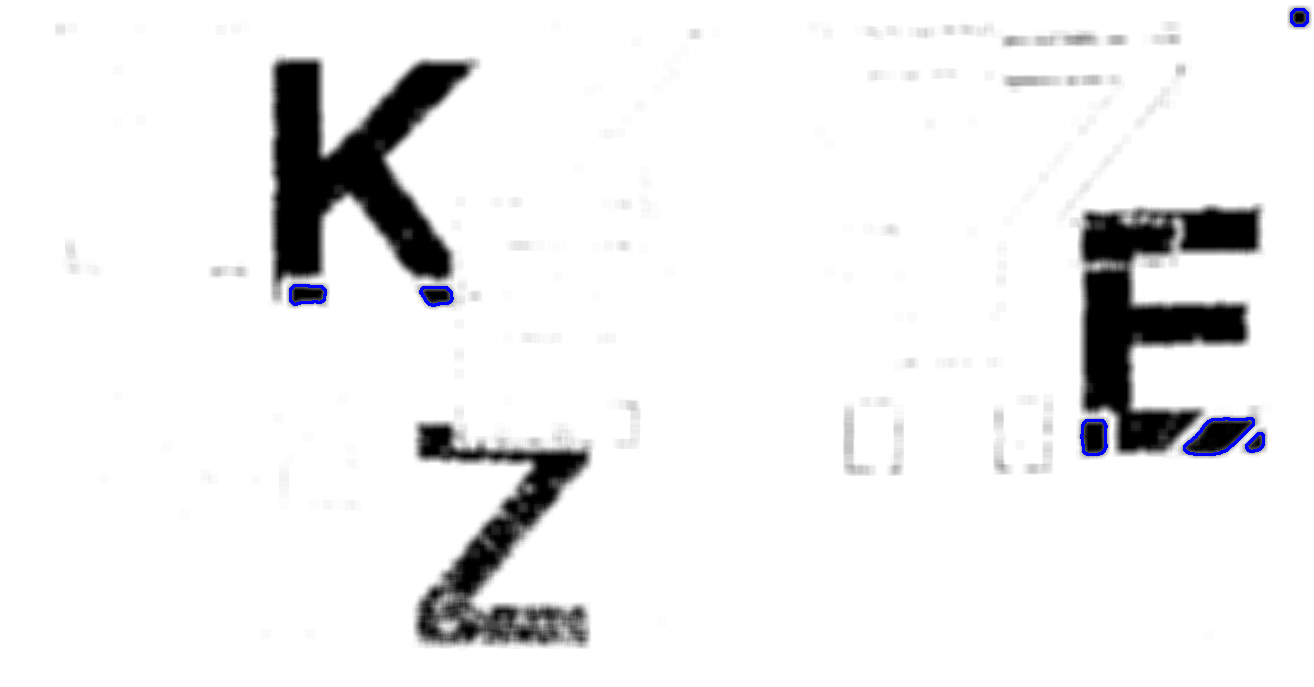

In [48]:
import pytesseract
import cv2

img = np.asarray(inputImage)
img = cv2.blur(img, (10, 10))
#img = inputImage

# norm_img = np.zeros((img.shape[0], img.shape[1]))
# img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
# img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
# img = cv2.blur(img, (10, 10))
# #img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)[1]
# display(Image.fromarray(img))
# text = pytesseract.image_to_string(img)

# print(text)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

items = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = items[0] if len(items) == 2 else items[1]

img_contour = img.copy()
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    if 100 < area < 10000:
        cv2.drawContours(img_contour, contours, i, (0, 0, 255), 2)

detected = ""
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    ratio = h/w
    area = cv2.contourArea(c)
    base = np.ones(thresh.shape, dtype=np.uint8)

    base[y:y+h, x:x+w] = thresh[y:y+h, x:x+w]
    segment = cv2.bitwise_not(base)

    custom_config = r'-l eng --oem 3 --psm 10 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ" '
    c = pytesseract.image_to_string(segment, config=custom_config)
    detected = detected + c

print("detected: " + detected)
display(Image.fromarray(img_contour))

In [ ]:
# Question 2
# How Many E's are dark grey?
print(detected.count('E'))